In [2]:
import pandas as pd

# Define file path
file_path = "/Users/asad/Downloads/Fictional_sales_data.csv"

# Load dataset
df = pd.read_csv(file_path)

# Display basic info
print("Dataset Info:")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display first few rows
print("\nSample Data:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5297 entries, 0 to 5296
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    5297 non-null   int64  
 1   Customer ID       5297 non-null   object 
 2   Gender            5297 non-null   object 
 3   Age               5297 non-null   int64  
 4   Product Category  5297 non-null   object 
 5   Price per Unit    5297 non-null   float64
 6   Geography         5297 non-null   object 
 7   Product name      5297 non-null   object 
 8   Salesperson       5297 non-null   object 
 9   Profit            5297 non-null   float64
 10  Total Amount      5297 non-null   float64
 11  Quantity          5297 non-null   int64  
 12  Order Date        5297 non-null   object 
 13  Ship Date         5297 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 579.5+ KB
None

Summary Statistics:
       Transaction ID          Age  P

In [4]:


# Load the dataset
file_path = "/Users/asad/Downloads/Fictional_sales_data.csv"
df = pd.read_csv(file_path)

# Convert 'Order Date' and 'Ship Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d', errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%Y-%m-%d', errors='coerce')

# Save the corrected dataset
corrected_file_path = "/Users/asad/Downloads/Fictional_sales_data_corrected.csv"
df.to_csv(corrected_file_path, index=False)

# Verify the changes
print("✅ Date format converted successfully.")
print(df[['Order Date', 'Ship Date']].dtypes)
print(df[['Order Date', 'Ship Date']].head())


✅ Date format converted successfully.
Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object
  Order Date  Ship Date
0 2024-12-04 2024-12-10
1 2023-11-22 2023-11-27
2 2024-01-17 2024-01-23
3 2024-09-09 2024-09-14
4 2023-09-16 2023-09-23


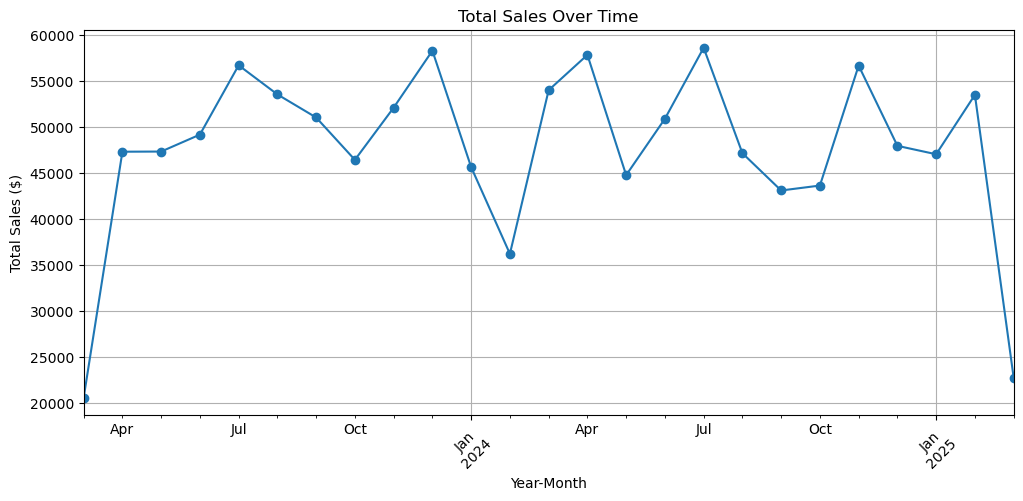

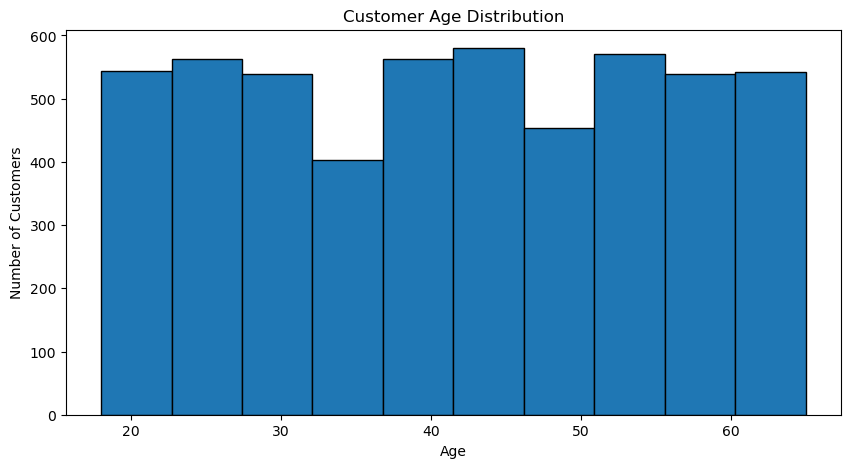

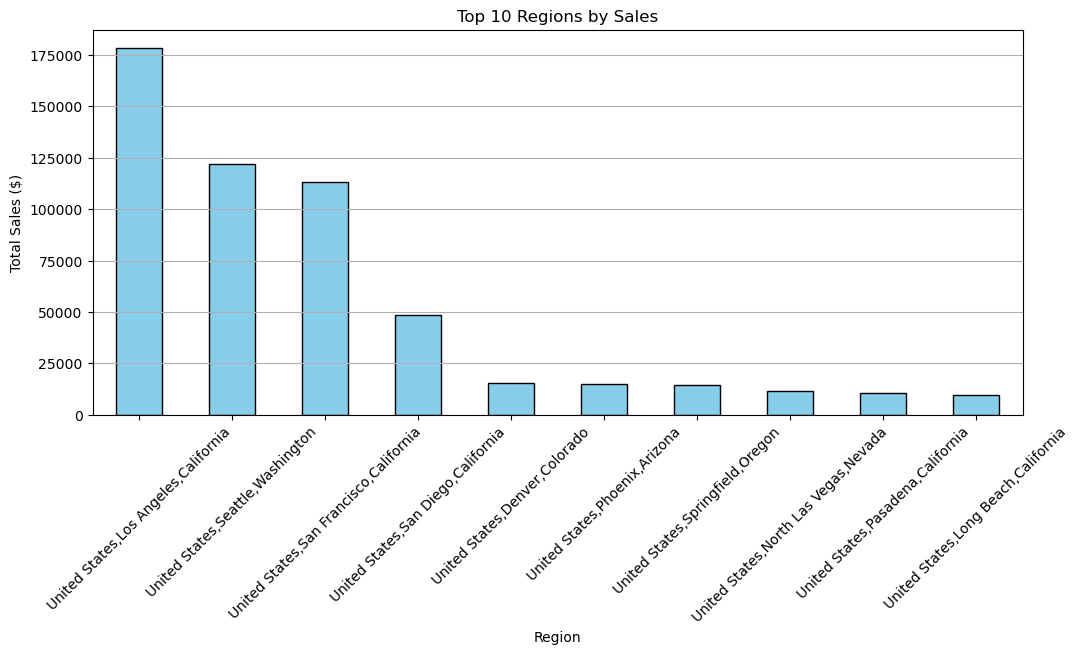

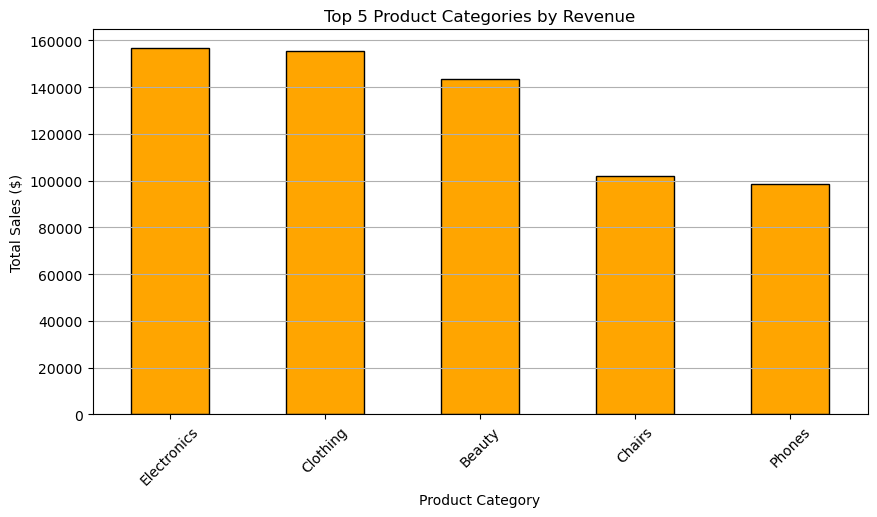

In [6]:
import matplotlib.pyplot as plt

# Load dataset
file_path = "/Users/asad/Downloads/Fictional_sales_data_corrected.csv"
df = pd.read_csv(file_path)

# Convert date columns again (just to be safe)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

### 🟢 1. Sales Trends Over Time ###
df['Year-Month'] = df['Order Date'].dt.to_period('M')  # Group by month
sales_trends = df.groupby('Year-Month')['Total Amount'].sum()

# Plot sales trends
plt.figure(figsize=(12, 5))
sales_trends.plot(marker='o', linestyle='-')
plt.title("Total Sales Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 🟢 2. Customer Demographics ###
plt.figure(figsize=(10, 5))
df['Age'].hist(bins=10, edgecolor='black')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.grid(False)
plt.show()

### 🟢 3. Geographic Sales Performance ###
top_regions = df.groupby('Geography')['Total Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
top_regions.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Regions by Sales")
plt.xlabel("Region")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### 🟢 4. Best-Selling Product Categories ###
top_categories = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))
top_categories.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Top 5 Product Categories by Revenue")
plt.xlabel("Product Category")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()